In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

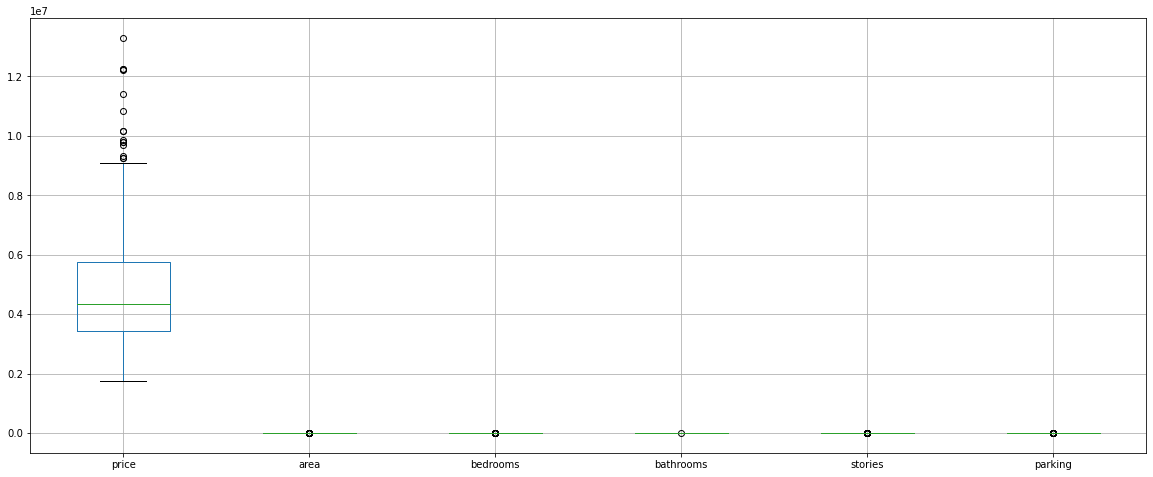

In [7]:
df.boxplot(figsize=(20,8))

In [8]:
min=df['price'].quantile(0.05)
max=df['price'].quantile(0.95)
new=np.where(df['price']<min,min,df['price'])
df.price=new
new=np.where(df['price']>max,max,df['price'])
df.price=new

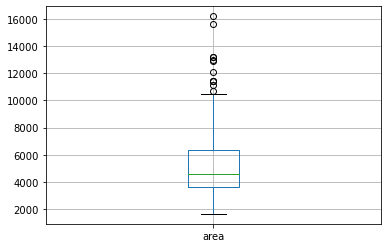

In [9]:
df.boxplot('area')

In [10]:
min=df['area'].quantile(0.05)
max=df['area'].quantile(0.95)
new=np.where(df['area']<min,min,df['area'])
df.area=new
new=np.where(df['area']>max,max,df['area'])
df.area=new

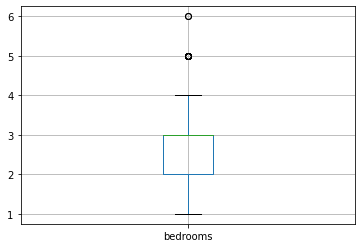

In [11]:
df.boxplot('bedrooms')

In [12]:
min=df['bedrooms'].quantile(0.05)
max=df['bedrooms'].quantile(0.95)
new=np.where(df['bedrooms']<min,min,df['bedrooms'])
df.bedrooms=new
new=np.where(df['bedrooms']>max,max,df['bedrooms'])
df.bedrooms=new

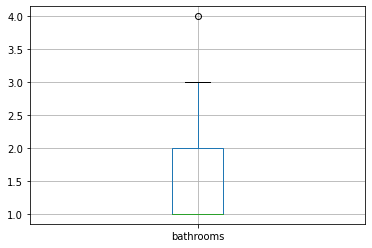

In [13]:
df.boxplot('bathrooms')

In [14]:
min=df['bathrooms'].quantile(0.05)
max=df['bathrooms'].quantile(0.95)
new=np.where(df['bathrooms']<min,min,df['bathrooms'])
df.bathrooms=new
new=np.where(df['bathrooms']>max,max,df['bathrooms'])
df.bathrooms=new

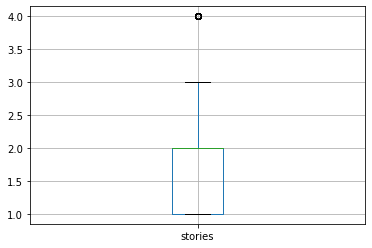

In [15]:
df.boxplot('stories')

In [16]:
min=df['stories'].quantile(0.05)
max=df['stories'].quantile(0.95)
new=np.where(df['stories']<min,min,df['stories'])
df.stories=new
new=np.where(df['stories']>max,max,df['stories'])
df.stories=new

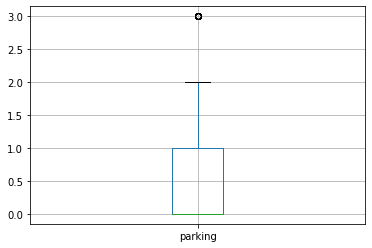

In [17]:
df.boxplot('parking')

In [18]:
min=df['parking'].quantile(0.05)
max=df['parking'].quantile(0.95)
new=np.where(df['parking']<min,min,df['parking'])
df.parking=new
new=np.where(df['parking']>max,max,df['parking'])
df.parking=new

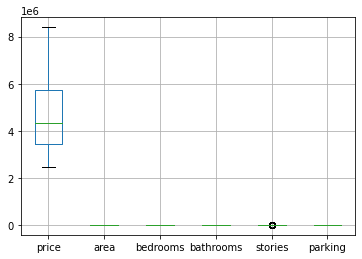

In [19]:
df.boxplot()

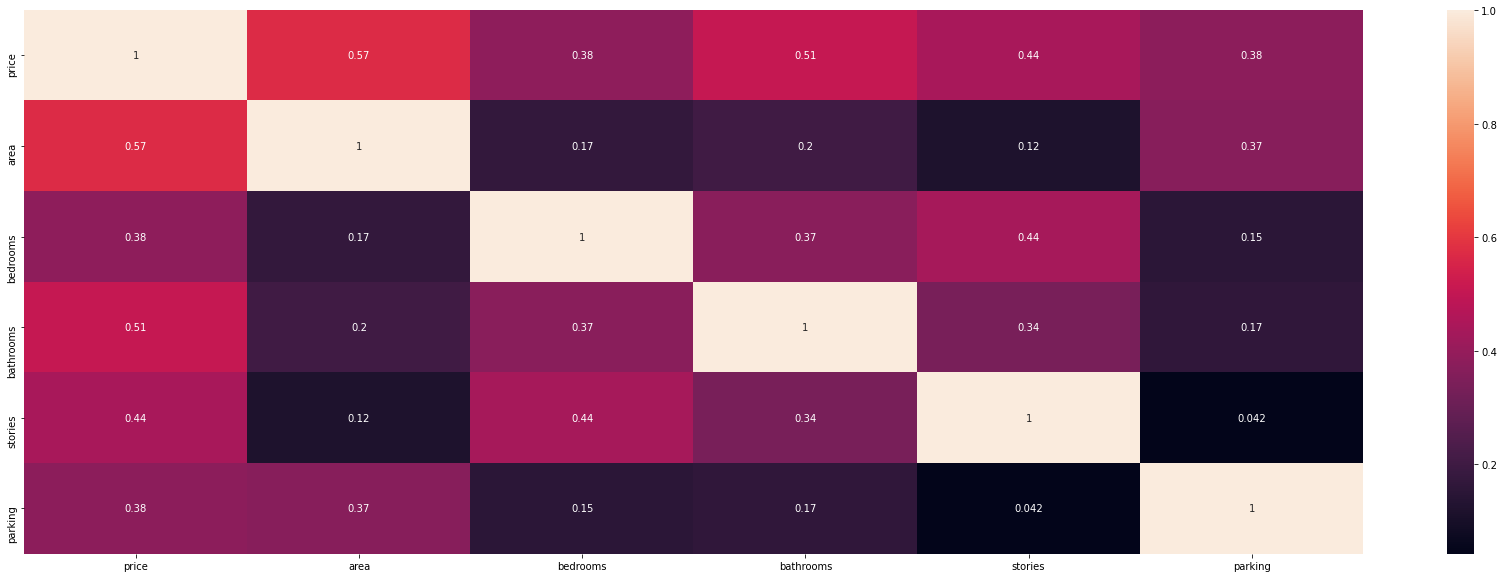

In [20]:
corr = df.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [21]:
#Linear

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#dummies

In [25]:
dummies = pd.get_dummies(df,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first = True)

In [26]:
final = pd.concat([df,dummies], axis = 1)

In [27]:
final = final.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)

In [28]:
Y = final['price']
X = final.drop(['price'],axis=1)

In [29]:
model = LinearRegression()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=70)

In [31]:
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(Y_test, Y_pred)
print("R2:", r2)

MSE: 856197683618.4811
RMSE: 925309.5069318595
R2: 0.6958030739353586


In [34]:
#encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [36]:
model = LinearRegression()

In [37]:
y = df['price']
x = df.drop(['price'],axis=1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70)

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 867338800889.56
RMSE: 931310.260272891
R2: 0.6918447665355244


In [42]:
#Random Forest-Encoding

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
Ry = df['price']
Rx = df.drop(['price'],axis=1)

In [45]:
Rx_train, Rx_test, Ry_train, Ry_test = train_test_split(Rx, Ry, test_size=0.3, random_state=70)

In [46]:
Rtree = RandomForestRegressor()

In [47]:
Rtree.fit(Rx_train,Ry_train)

RandomForestRegressor()

In [48]:
Rtree.score(Rx_test,Ry_test)

0.7118867410077621

In [49]:
Ry_pred = Rtree.predict(Rx_test)

In [50]:
importances = list(Rtree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Rx_test, importances)]
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: area                 Importance: 0.48
Variable: bedrooms             Importance: 0.04
Variable: bathrooms            Importance: 0.13
Variable: stories              Importance: 0.06
Variable: mainroad             Importance: 0.01
Variable: guestroom            Importance: 0.02
Variable: basement             Importance: 0.04
Variable: hotwaterheating      Importance: 0.02
Variable: airconditioning      Importance: 0.05
Variable: parking              Importance: 0.05
Variable: prefarea             Importance: 0.03
Variable: furnishingstatus     Importance: 0.06


In [65]:
show = pd.DataFrame(Ry_pred,Ry_test)

In [68]:
show.head(20).round()

,0
price,
5775000.0,6684300.0
4473000.0,3946950.0
6755000.0,6696550.0
4830000.0,5864478.0
6107500.0,4071025.0
4893000.0,5098485.0
3150000.0,3569300.0
6083000.0,6164340.0
2653000.0,3085530.0


In [53]:
#2nd Method for Linear in Python

In [54]:
yy = df['price']
xx = df.drop(['price'],axis=1)

In [55]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.3, random_state=70)

In [56]:
import statsmodels.regression.linear_model as sm
lm = sm.OLS(yy_train,xx_train).fit()

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              914.3
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                   5.64e-266
Time:                        00:17:11   Log-Likelihood:                         -5765.2
No. Observations:                 381   AIC:                                  1.155e+04
Df Residuals:                     369   BIC:                                  1.160e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area               262.4664     29.201      8.988      0.000     205.045     319.888
bedrooms          1.674e+05   6.86e+04      2.440      0.015    3.25e+04    3.02e+05
bathrooms         9.527e+05   1.15e+05      8.292      0.000    7.27e+05    1.18e+06
stories           4.089e+05   6.54e+04      6.257      0.000     2.8e+05    5.37e+05
mainroad          4.893e+05   1.36e+05      3.606      0.000    2.22e+05    7.56e+05
guestroom         2.746e+05   1.38e+05      1.990      0.047    3305.603    5.46e+05
basement          3.164e+05   1.13e+05      2.806      0.005    9.47e+04    5.38e+05
hotwaterheating   1.072e+06   2.32e+05      4.621      0.000    6.16e+05    1.53e+06
airconditioning   7.306e+05   1.12e+05      6.533      0.000    5.11e+05    9.51e+05
parking           2.068e+05   6.32e+04      3.270      0.001    8.24e+04    3.31e+05
prefarea          5.343e+05   1.21e+05      4.425      0.000    2.97e+05    7.72e+05
furnishingstatus -1.813e+05   5.88e+04     -3.085      0.002   -2.97e+05   -6.57e+04
==============================================================================
Omnibus:                       16.018   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.778
Skew:                           0.335   Prob(JB):                     1.13e-05
Kurtosis:                       3.993   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
yy_pred = lm.predict(xx_test)

In [59]:
mse = mean_squared_error(yy_test, yy_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(yy_test, yy_pred)
print("R2:", r2)

MSE: 867594448019.5743
RMSE: 931447.5014833495
R2: 0.6917539381291931
